# Classification Approch

#  رویکرد KNN رویکردی مناسب تری بود
## Lineaer


              precision    recall  f1-score   support

           N       0.86      0.96      0.91        26
           O       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30

## Polynimal

In [38]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)


## Work flow
0. [X] Clean and Engeering Data for X and y
1. [X] Split Data in Train/Test for X and y
2. [X] Scaler on Training X & X test
3. [x] Create Model(s)
4. [x] Fit/Train Model(s) on X Train
5. [ ] Evaluate Model(s) on X test
6. [ ] Adjust Param as Necessary
7. [ ] Bonus: Save Model(s)

### PreProcess


In [39]:
cols = ['Season','Age','Childish diseases','Trauma','Surgical','High fever','Alcohol consumption','Smoking','Sitting hour/day','Output']
df= pd.read_csv('../fertility_Diagnosis.txt',names=cols)
df

,Season,Age,Childish diseases,Trauma,Surgical,High fever,Alcohol consumption,Smoking,Sitting hour/day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


#### Clean and Engeering Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               100 non-null    float64
 1   Age                  100 non-null    float64
 2   Childish diseases    100 non-null    int64  
 3   Trauma               100 non-null    int64  
 4   Surgical             100 non-null    int64  
 5   High fever           100 non-null    int64  
 6   Alcohol consumption  100 non-null    float64
 7   Smoking              100 non-null    int64  
 8   Sitting hour/day     100 non-null    float64
 9   Output               100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [41]:
#df['Output']= df['Output'].map({'N':1,'O':0})

In [42]:
df

,Season,Age,Childish diseases,Trauma,Surgical,High fever,Alcohol consumption,Smoking,Sitting hour/day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


#### Split Data in Train/Test for X and y


In [43]:
X = df.drop(['Output'],axis=1)
y = df['Output']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1099,stratify=y)
y.value_counts()

Output
N    88
O    12
Name: count, dtype: int64

### Model

#### Create Model(s)

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
scale = StandardScaler()
rf =RandomForestClassifier()

In [61]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [62]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
pipe =Pipeline([('scaler',scale),('rf',rf)])


In [64]:
criterion = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2", None]
n_estimators = list(range(5,201,1))

In [65]:
hyp_par = {'rf__criterion':criterion,
           'rf__max_features':max_features,
           'rf__n_estimators':n_estimators  }

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
full_model = GridSearchCV(pipe,hyp_par,cv=2,scoring='accuracy')


#### Train Model

In [68]:
full_model.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_features': ['sqrt', 'log2', None],
                         'rf__n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 19, 20, 21, 22,
                                              23, 24, 25, 26, 27, 28, 29, 30,
                                              31, 32, 33, 34, ...]},
             scoring='accuracy')

### Evaluate model

#### Test On data

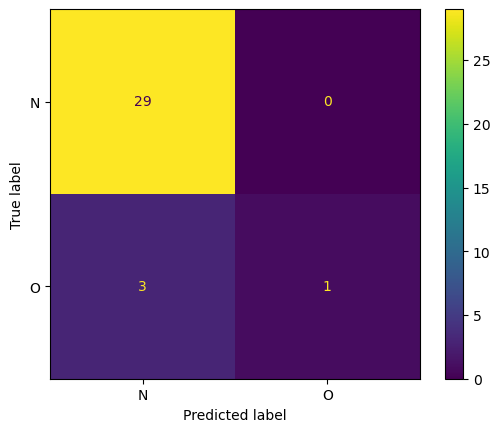

In [69]:
y_pred =full_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred),display_labels=full_model.classes_).plot()

In [70]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           N       0.91      1.00      0.95        29
           O       1.00      0.25      0.40         4

    accuracy                           0.91        33
   macro avg       0.95      0.62      0.68        33
weighted avg       0.92      0.91      0.88        33



In [71]:
full_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(n_estimators=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestClassifier(n_estimators=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 21,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

### Final Model(s)


#### Train on all Data 

##### no need

#### Save with joblib

In [28]:
import joblib


In [29]:
joblib.dump(value=full_model,filename='Random_forest.pkl')

['Random_forest.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
